


1. **Introduction**

In this project, the goal is to handle imbalanced financial data and use machine learning models to predict financial outcomes such as fraud detection or loan default prediction. Imbalanced datasets are a common issue in financial applications where the number of fraudulent transactions or loan defaults is much smaller compared to legitimate transactions or non-defaults.

**Objective**: Evaluating model performance using key metrics like accuracy, precision, recall and F1-score to assess the model's ability to identify fraudulent transactions or defaults.

*   The primary objective is to develop a model that can predict fraud or default accurately despite the class imbalance. We will focus on:
*   Handling imbalanced data using techniques such as SMOTE, undersampling and cost-sensitive learning.
*   Training machine learning models including Logistic Regression and Random Forest.
* Training machine learning models including Logistic Regression and Random Forest.



2. Generating the Synthetic Financial Dataset
In this section, we will create a synthetic dataset that mimics a financial dataset. The dataset will include various financial features like income, loan amount, credit score and transaction amount. Additionally, we will generate a binary target variable indicating whether a transaction or loan is fraudulent or non-fraudulent (fraud = 1, non-fraud = 0).



*  This dataset will be imbalanced, as in real-world financial data, fraudulent transactions or defaults are usually much less frequent than non-fraudulent ones.

Generating Features
We'll generate the following features for this synthetic dataset:

* Income: The income of the individual or entity (numeric).
* Credit Score: A numerical representation of the person's or entity's credit score (numeric).
* Loan Amount: The amount of loan taken (numeric).
*  Transaction Amount: The amount of a transaction (numeric).
* Previous Loan Amount: Loan history (numeric).
* Balance: Account balance (numeric).
* Debt-to-Income Ratio: Financial health indicator (numeric).
* Age: Age of the individual or entity (numeric).
* Account Type: Type of account, e.g., checking, savings (categorical).
*  Payment Status: Status of previous payments (categorical).
* Target Variable: Fraud/Default: A binary variable indicating whether the transaction or loan was fraudulent (1) or non-fraudulent (0).

     Income  Credit_Score  Loan_Amount  Transaction_Amount       Age  \
0 -0.443263      0.761935     0.463107           -1.801838  0.536963   
1 -1.531535     -0.270341     1.537062            1.668928  0.823755   
2 -0.272410      1.166431     1.069958           -2.400287 -0.631039   
3  0.549683      1.042303     1.816122            1.381950  1.279009   
4 -0.188202      1.314243     2.598907            3.503985  2.848173   

   Previous_Loan_Amount Payment_Status Account_Type      Balance  \
0             -0.996258        On-time     Checking  2366.052240   
1             -1.112120        Default     Checking  2519.358938   
2             -2.684484           Late      Savings  4320.563324   
3             -0.408466        On-time      Savings  6102.096520   
4              1.339419        On-time      Savings  7740.753879   

   Debt_To_Income_Ratio  Fraud/Default  
0              1.802064              0  
1              0.268731              0  
2              3.534072            

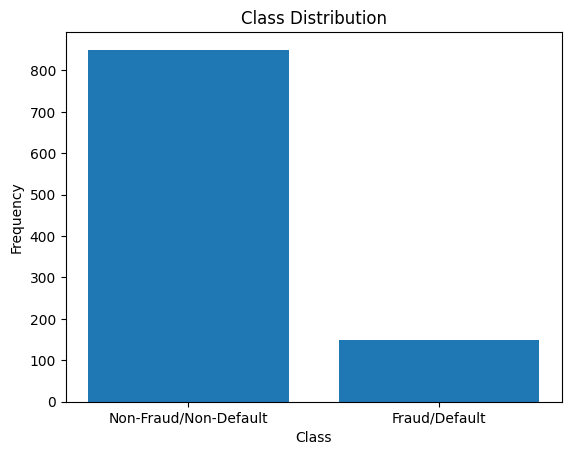

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from collections import Counter

# Set random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset with financial-like features
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=3, n_clusters_per_class=2,
                           weights=[0.85, 0.15], flip_y=0, random_state=42)

# Create a DataFrame for the independent variables (X)
X_df = pd.DataFrame(X, columns=['Income', 'Credit_Score', 'Loan_Amount', 'Transaction_Amount', 'Age',
                                'Previous_Loan_Amount', 'Payment_Status', 'Account_Type', 'Balance', 'Debt_To_Income_Ratio'])

# Now, manually assign realistic categorical values to "Payment_Status" and "Account_Type"
X_df['Payment_Status'] = np.random.choice(['On-time', 'Late', 'Default'], size=X_df.shape[0], p=[0.7, 0.2, 0.1])
X_df['Account_Type'] = np.random.choice(['Checking', 'Savings', 'Credit'], size=X_df.shape[0], p=[0.6, 0.3, 0.1])

# For Balance, we'll assume it's normally distributed around $5000 with a standard deviation of $3000
X_df['Balance'] = np.random.normal(5000, 3000, size=X_df.shape[0])

# Create a DataFrame for the response variable (y)
# Ensure Fraud/Default is binary (0 or 1)
y_df = pd.DataFrame(y, columns=['Fraud/Default'])

# Combine X and y into one DataFrame for the complete dataset
financial_dataset = pd.concat([X_df, y_df], axis=1)

# Display the first few rows of the dataset
print(financial_dataset.head())

# Visualize the class distribution
class_distribution = y_df['Fraud/Default'].value_counts()
print(f"Class distribution: \n{class_distribution}")

plt.bar([0, 1], [class_distribution[0], class_distribution[1]], tick_label=['Non-Fraud/Non-Default', 'Fraud/Default'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


- Summary statistics

In [ ]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(financial_dataset.describe())


Summary Statistics:
            Income  Credit_Score  Loan_Amount  Transaction_Amount  \
count  1000.000000   1000.000000  1000.000000         1000.000000   
mean     -0.019033      0.647618    -0.008252           -0.513720   
std       1.029587      1.868305     1.531084            2.309072   
min      -2.833030     -5.604005    -4.466020           -5.766093   
25%      -0.722399     -0.517029    -1.176289           -2.181447   
50%      -0.060376      0.656198    -0.145583           -0.614990   
75%       0.685432      1.751945     1.046427            1.003096   
max       3.098299      7.049746     4.837464            8.526805   

               Age  Previous_Loan_Amount  Payment_Status  Account_Type  \
count  1000.000000           1000.000000     1000.000000   1000.000000   
mean     -0.483625             -0.888751        1.612000      0.763000   
std       2.036134              1.183751        0.661736      0.920695   
min      -7.014923             -4.416512        0.000000      

- Scatter plot

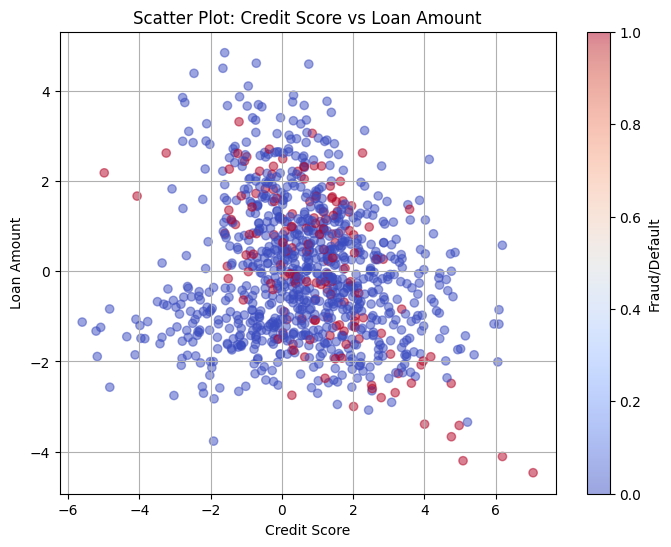

In [ ]:
# Scatter plot between 'Credit_Score' and 'Loan_Amount'
plt.figure(figsize=(8, 6))
plt.scatter(financial_dataset['Credit_Score'], financial_dataset['Loan_Amount'], alpha=0.5, c=financial_dataset['Fraud/Default'], cmap='coolwarm')
plt.title("Scatter Plot: Credit Score vs Loan Amount")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.colorbar(label="Fraud/Default")
plt.grid(True)
plt.show()


- Boxplots

<Figure size 800x600 with 0 Axes>

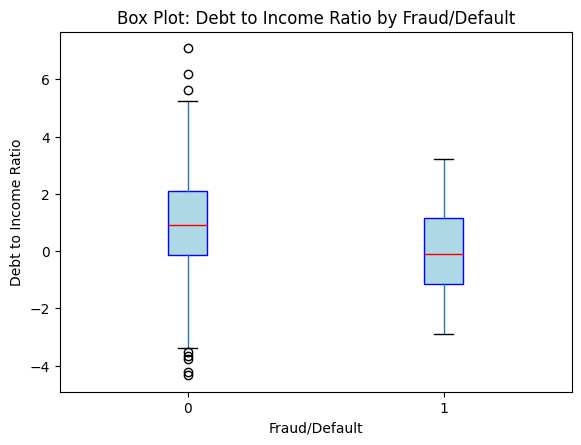

In [ ]:
# Box plot for 'Debt_To_Income_Ratio' grouped by 'Fraud/Default'
plt.figure(figsize=(8, 6))
financial_dataset.boxplot(column='Debt_To_Income_Ratio', by='Fraud/Default', grid=False, patch_artist=True,
                          boxprops=dict(facecolor='lightblue', color='blue'),
                          medianprops=dict(color='red'))
plt.title("Box Plot: Debt to Income Ratio by Fraud/Default")
plt.suptitle("")
plt.xlabel("Fraud/Default")
plt.ylabel("Debt to Income Ratio")
plt.show()





1.    **Addressing Class Imbalance**

*  Class imbalance is a common issue in many real-world datasets including financial datasets like fraud detection. We'll address the imbalance using the following techniques:
*  SMOTE (Synthetic Minority Over-sampling Technique)
Undersampling (Randomly removing majority class samples)
* Cost-Sensitive Learning (using class weights in models like Logistic Regression)









2.1 SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE creates synthetic samples for the minority class to balance the dataset. Let’s apply SMOTE to our dataset:

Class distribution after SMOTE: 
Fraud/Default
0    850
1    850
Name: count, dtype: int64


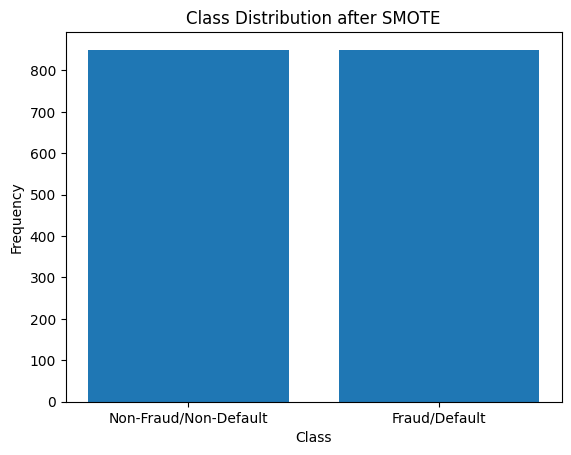

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE

# Set random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset with financial-like features
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=3, n_clusters_per_class=2,
                           weights=[0.85, 0.15], flip_y=0, random_state=42)

# Create a DataFrame for the independent variables (X)
X_df = pd.DataFrame(X, columns=['Income', 'Credit_Score', 'Loan_Amount', 'Transaction_Amount', 'Age',
                                'Previous_Loan_Amount', 'Payment_Status', 'Account_Type', 'Balance', 'Debt_To_Income_Ratio'])

# Now, manually assign realistic categorical values to "Payment_Status" and "Account_Type"
X_df['Payment_Status'] = np.random.choice(['On-time', 'Late', 'Default'], size=X_df.shape[0], p=[0.7, 0.2, 0.1])
X_df['Account_Type'] = np.random.choice(['Checking', 'Savings', 'Credit'], size=X_df.shape[0], p=[0.6, 0.3, 0.1])

# For Balance, we'll assume it's normally distributed around $5000 with a standard deviation of $3000
X_df['Balance'] = np.random.normal(5000, 3000, size=X_df.shape[0])

# Label encode the categorical variables: 'Payment_Status' and 'Account_Type'
label_encoder = LabelEncoder()

X_df['Payment_Status'] = label_encoder.fit_transform(X_df['Payment_Status'])
X_df['Account_Type'] = label_encoder.fit_transform(X_df['Account_Type'])

# Create a DataFrame for the response variable (y)
y_df = pd.DataFrame(y, columns=['Fraud/Default'])

# Combine X and y into one DataFrame for the complete dataset
financial_dataset = pd.concat([X_df, y_df], axis=1)

# Separate features and target variable
X = financial_dataset.drop(columns=['Fraud/Default'])
y = financial_dataset['Fraud/Default']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
print(f"Class distribution after SMOTE: \n{y_res.value_counts()}")

# Visualizing the new class distribution
plt.bar([0, 1], [y_res.value_counts()[0], y_res.value_counts()[1]], tick_label=['Non-Fraud/Non-Default', 'Fraud/Default'])
plt.title('Class Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()



*   After applying SMOTE, the minority class (fraud/default) will have synthetic samples generated to balance the dataset. We visualize the new class distribution to see how SMOTE has balanced the data.

2.2 Undersampling
In contrast to SMOTE, undersampling reduces the number of samples from the majority class to balance the dataset. Let's apply undersampling:

Class distribution after Undersampling: 
Fraud/Default
0    150
1    150
Name: count, dtype: int64


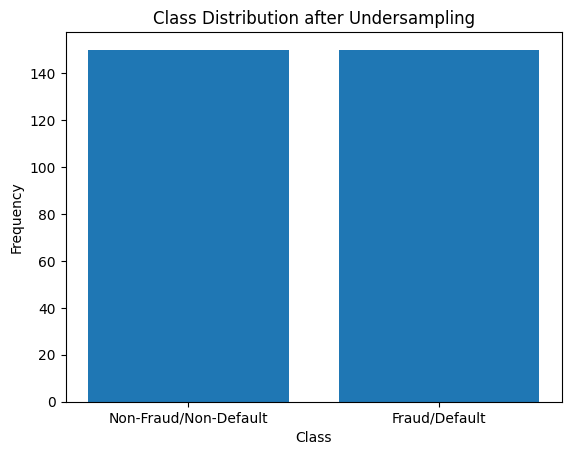

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling to balance the classes
undersample = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersample.fit_resample(X, y)

# Check the class distribution after undersampling
print(f"Class distribution after Undersampling: \n{y_undersampled.value_counts()}")

# Visualizing the new class distribution
plt.bar([0, 1], [y_undersampled.value_counts()[0], y_undersampled.value_counts()[1]], tick_label=['Non-Fraud/Non-Default', 'Fraud/Default'])
plt.title('Class Distribution after Undersampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()




*   After applying undersampling, we reduce the majority class (non-fraud/non-default) to match the number of instances in the minority class (fraud/default). thus balancing the dataset.

2.3 Cost-Sensitive Learning (Weighted Logistic Regression)
Cost-sensitive learning involves adjusting the learning algorithm to give more weight to the minority class during training. This can be done with Logistic Regression by using the class_weight='balanced' parameter.




- Histogram

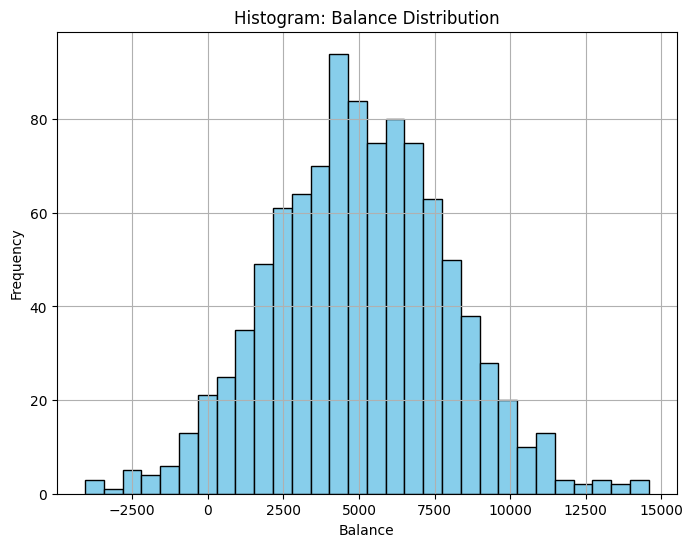

In [ ]:
# Histogram of 'Balance'
plt.figure(figsize=(8, 6))
plt.hist(financial_dataset['Balance'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram: Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

 Splitting the Data into Training and Testing Sets

In [ ]:
# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_res, y_res)

# Make predictions on the resampled data
y_pred_log_reg = log_reg.predict(X_res)

# Evaluate the Logistic Regression model
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_res, y_pred_log_reg):.4f}")
print(classification_report(y_res, y_pred_log_reg))

# Confusion Matrix
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_res, y_pred_log_reg))


Logistic Regression Evaluation:
Accuracy: 0.8459
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       850
           1       0.82      0.88      0.85       850

    accuracy                           0.85      1700
   macro avg       0.85      0.85      0.85      1700
weighted avg       0.85      0.85      0.85      1700

Confusion Matrix (Logistic Regression):
[[691 159]
 [103 747]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression is trained using class weights where the minority class is given more importance during training. This helps in improving the model's performance on the minority class without changing the dataset.

3. **Train Predictive Models**

*   Now that we've addressed the class imbalance using SMOTE, undersampling and cost-sensitive learning. Logistic Regression and Random Forest. We'll evaluate the performance of these models on the resampled datasets.





3.1 Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression on the training data
log_reg_smote = LogisticRegression(random_state=42)
log_reg_smote.fit(X_train, y_train)

# Make predictions on the test data
y_pred_log_reg_smote = log_reg_smote.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression with SMOTE (After Train-Test Split)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg_smote):.4f}")
print(classification_report(y_test, y_pred_log_reg_smote))

Logistic Regression with SMOTE (After Train-Test Split)
Accuracy: 0.8735
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       179
           1       0.84      0.90      0.87       161

    accuracy                           0.87       340
   macro avg       0.87      0.87      0.87       340
weighted avg       0.88      0.87      0.87       340



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regression is trained on the SMOTE-resampled dataset and we evaluate its performance using accuracy and other classification metrics like precision, recall, and F1-score.

3.2 Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# Train Random Forest model
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model on the test data
print("Random Forest Evaluation (Test Set):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix (Random Forest - Test Set):")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Evaluation (Test Set):
Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       255
           1       0.90      0.97      0.94       255

    accuracy                           0.93       510
   macro avg       0.94      0.93      0.93       510
weighted avg       0.94      0.93      0.93       510

Confusion Matrix (Random Forest - Test Set):
[[229  26]
 [  8 247]]


Cross-Validation (Optional)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define Random Forest model
rf_smote = RandomForestClassifier(random_state=42, n_estimators=100)

# Perform cross-validation for Random Forest model
cv_scores_rf = cross_val_score(rf_smote, X_res, y_res, cv=5)
print(f"Random Forest - Cross-Validation Scores: {cv_scores_rf}")
print(f"Random Forest - Mean CV Score: {cv_scores_rf.mean():.4f}")

# Define Logistic Regression model
log_reg_smote = LogisticRegression(random_state=42)

# Perform cross-validation for Logistic Regression model
cv_scores_log_reg = cross_val_score(log_reg_smote, X_res, y_res, cv=5)
print(f"Logistic Regression - Cross-Validation Scores: {cv_scores_log_reg}")
print(f"Logistic Regression - Mean CV Score: {cv_scores_log_reg.mean():.4f}")


Random Forest - Cross-Validation Scores: [0.95294118 0.97647059 0.93235294 0.93823529 0.94117647]
Random Forest - Mean CV Score: 0.9482


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression - Cross-Validation Scores: [0.82941176 0.88823529 0.85294118 0.83235294 0.82941176]
Logistic Regression - Mean CV Score: 0.8465


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
